In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

In [4]:
from sklearn.datasets import fetch_20newsgroups

In [5]:
#All the categories of news have been imported
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
categories = ['alt.atheism', 'comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware','comp.windows.x','misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball',
 'rec.sport.hockey','sci.crypt','sci.electronics','sci.med','sci.space','soc.religion.christian',
 'talk.politics.guns','talk.politics.mideast','talk.politics.misc','talk.religion.misc']


train = fetch_20newsgroups(subset='train', categories=categories)

test = fetch_20newsgroups(subset='test', categories=categories)

In [10]:
#this is an example of 5th article of train dataset
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [11]:
print(test.data[10])

From: Greg.Reinacker@FtCollins.NCR.COM
Subject: Windows On-Line Review uploaded
Reply-To: Greg.Reinacker@FtCollinsCO.NCR.COM
Organization: NCR Microelectronics, Ft. Collins, CO
Lines: 12

I have uploaded the Windows On-Line Review shareware edition to
ftp.cica.indiana.edu as /pub/pc/win3/uploads/wolrs7.zip.

It is an on-line magazine which contains reviews of some shareware
products...I grabbed it from the Windows On-Line BBS.

--
--------------------------------------------------------------------------
Greg Reinacker                          (303) 223-5100 x9289
NCR Microelectronic Products Division   VoicePlus 464-9289
2001 Danfield Court                     Greg.Reinacker@FtCollinsCO.NCR.COM
Fort Collins, CO  80525



In [12]:
print(len(train.data))

11314


In [13]:
print(len(test.data))

7532


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [21]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data, train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.float64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, sm...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [24]:
pred = model.predict(test.data)

In [25]:
from sklearn.metrics import confusion_matrix

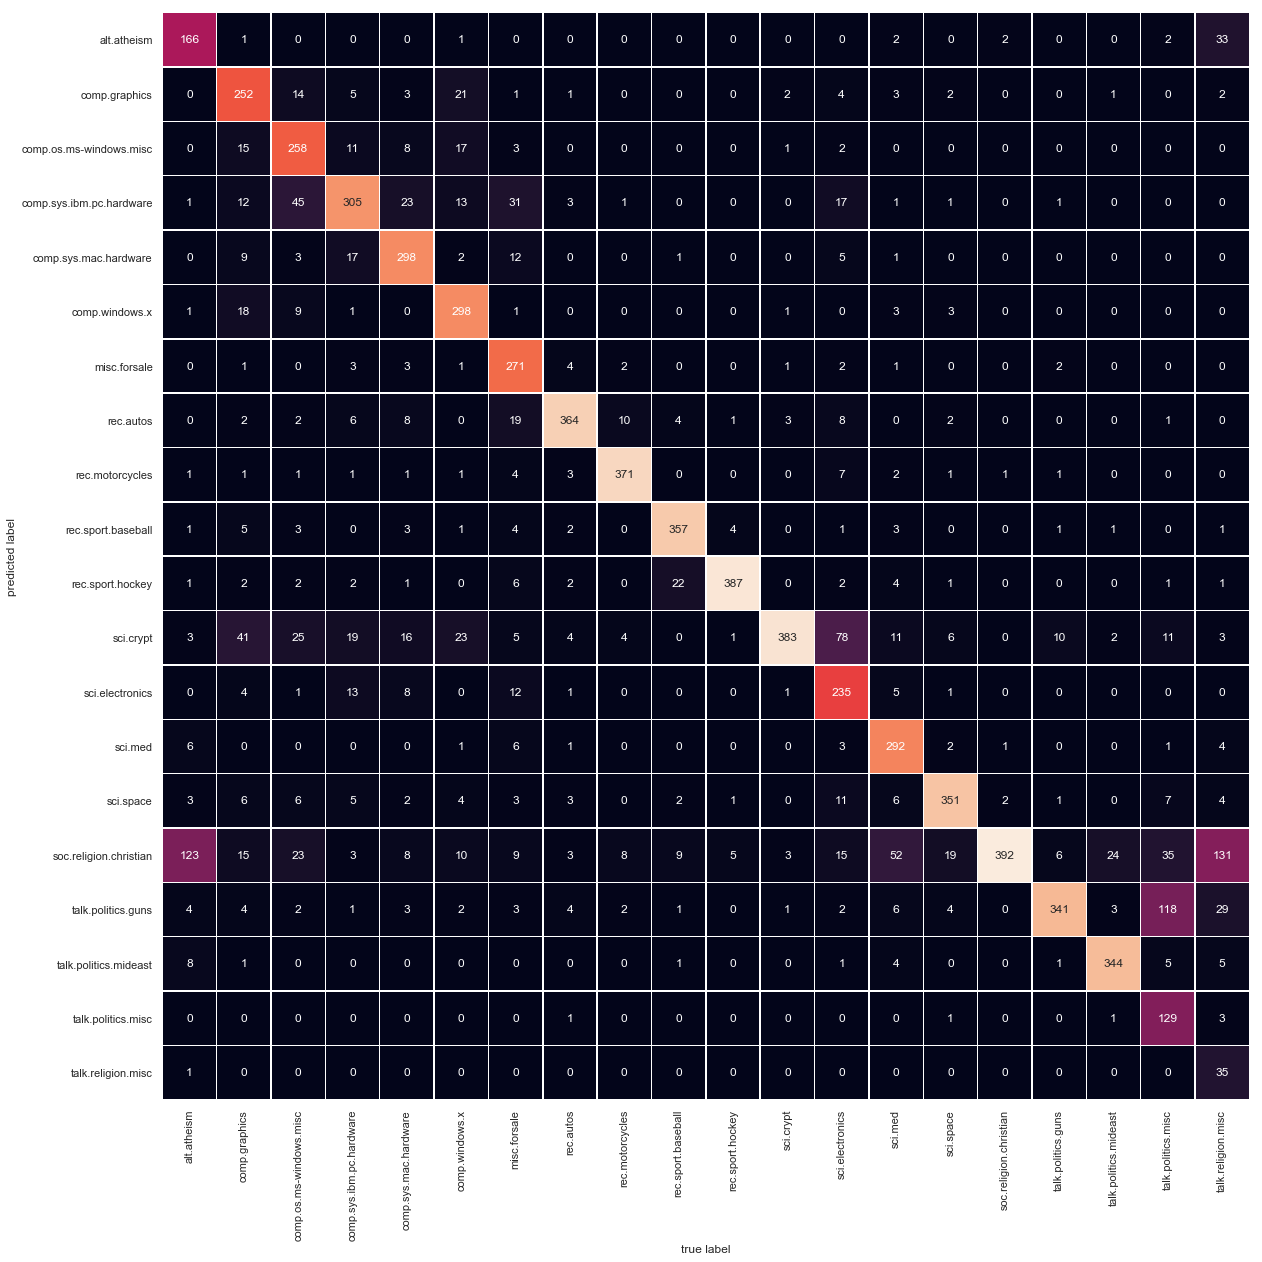

In [34]:
mat = confusion_matrix(test.target,pred)
plt.figure(figsize=(20,20))
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels= train.target_names,
            yticklabels = train.target_names,linewidth=0.5)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [37]:
def predict_cat(s,train=train,model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [38]:
predict_cat('jesus christ')

'soc.religion.christian'

In [39]:
predict_cat('politically')

'talk.politics.guns'

In [40]:
predict_cat('resistors')

'sci.electronics'

In [41]:
predict_cat('score')

'rec.sport.hockey'

In [49]:
#other way using categories
def predict_cat(s,train=train,model=model):
    pred = model.predict([s])
    return categories[pred[0]]

In [50]:
predict_cat('jesus christ')

'soc.religion.christian'

In [53]:
predict_cat('bluetooth')

'rec.sport.hockey'

PART 2 - ANOTHER EXAMPLE

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

In [4]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [5]:
iris= load_iris()

In [6]:
X= iris.data
Y=iris.target

In [7]:
print iris.DESCR

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
model = GaussianNB()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [10]:
model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
Y_pred = model.predict(X_test)
Y_pred

array([2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1,
       0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2])

In [12]:
Y_test

array([2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2])

In [14]:
cm = metrics.confusion_matrix(Y_test,Y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 14]], dtype=int64)

In [18]:
score = metrics.accuracy_score(Y_test,Y_pred)
score

0.9473684210526315

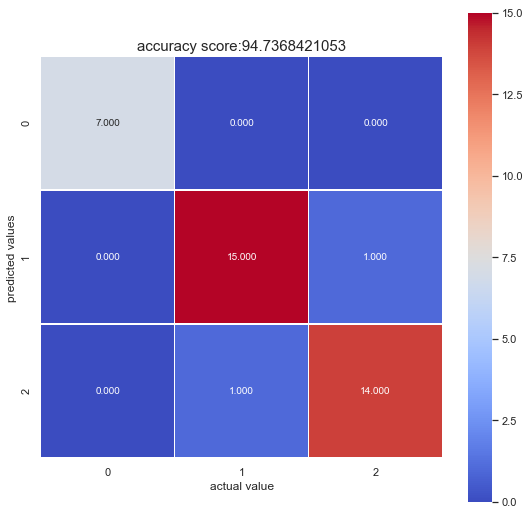

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidth=0.5,square=True,cmap='coolwarm')
plt.xlabel('actual value')
plt.ylabel('predicted values')
all_sampl_title= 'accuracy score:{0}' .format(score*100)
plt.title(all_sampl_title,size=15);